### Importación de datos



In [74]:
import folium
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [42]:
print(tienda.shape[0])
print(tienda2.shape[0])
print(tienda3.shape[0])
print(tienda4.shape[0])

2359
2359
2359
2358


#1. Análisis de facturación



In [43]:
ingreso_tienda = tienda["Precio"].sum()
ingreso_tienda2 = tienda2["Precio"].sum()
ingreso_tienda3 = tienda3["Precio"].sum()
ingreso_tienda4 = tienda4["Precio"].sum()

print(f"El ingreso Total por tienda es: \nTienda 1 --> {ingreso_tienda} \nTienda 2 --> {ingreso_tienda2}  \nTienda 3 --> {ingreso_tienda3}  \nTienda 4 --> {ingreso_tienda4}")

El ingreso Total por tienda es: 
Tienda 1 --> 1150880400.0 
Tienda 2 --> 1116343500.0  
Tienda 3 --> 1098019600.0  
Tienda 4 --> 1038375700.0


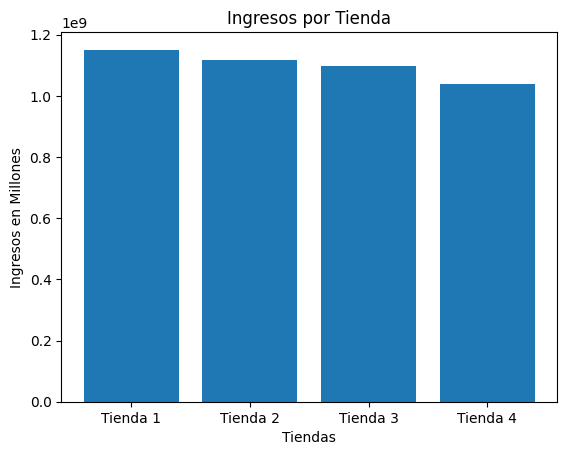

In [44]:
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
cantidad_filas = [ingreso_tienda, ingreso_tienda2, ingreso_tienda3, ingreso_tienda4]
plt.bar(nombres_tiendas, cantidad_filas)
plt.xlabel('Tiendas')
plt.ylabel('Ingresos en Millones')
plt.title('Ingresos por Tienda')
plt.show()

# 2. Ventas por categoría

In [79]:
ventas_por_categoria = tienda.groupby('Categoría del Producto')['Precio'].sum()
ventas_por_categoria2 = tienda2.groupby('Categoría del Producto')['Precio'].sum()
ventas_por_categoria3 = tienda3.groupby('Categoría del Producto')['Precio'].sum()
ventas_por_categoria4 = tienda4.groupby('Categoría del Producto')['Precio'].sum()

print(ventas_por_categoria)
print(ventas_por_categoria2)
print(ventas_por_categoria3)
print(ventas_por_categoria4)

Categoría del Producto
Artículos para el hogar     12698400.0
Deportes y diversión        39290000.0
Electrodomésticos          363685200.0
Electrónicos               429493500.0
Instrumentos musicales      91299000.0
Juguetes                    17995700.0
Libros                       8784900.0
Muebles                    187633700.0
Name: Precio, dtype: float64
Categoría del Producto
Artículos para el hogar     14746900.0
Deportes y diversión        34744500.0
Electrodomésticos          348567800.0
Electrónicos               410831100.0
Instrumentos musicales     104990300.0
Juguetes                    15945400.0
Libros                      10091200.0
Muebles                    176426300.0
Name: Precio, dtype: float64
Categoría del Producto
Artículos para el hogar     15060000.0
Deportes y diversión        35593100.0
Electrodomésticos          329237900.0
Electrónicos               410775800.0
Instrumentos musicales      77380900.0
Juguetes                    19401100.0
Libros         

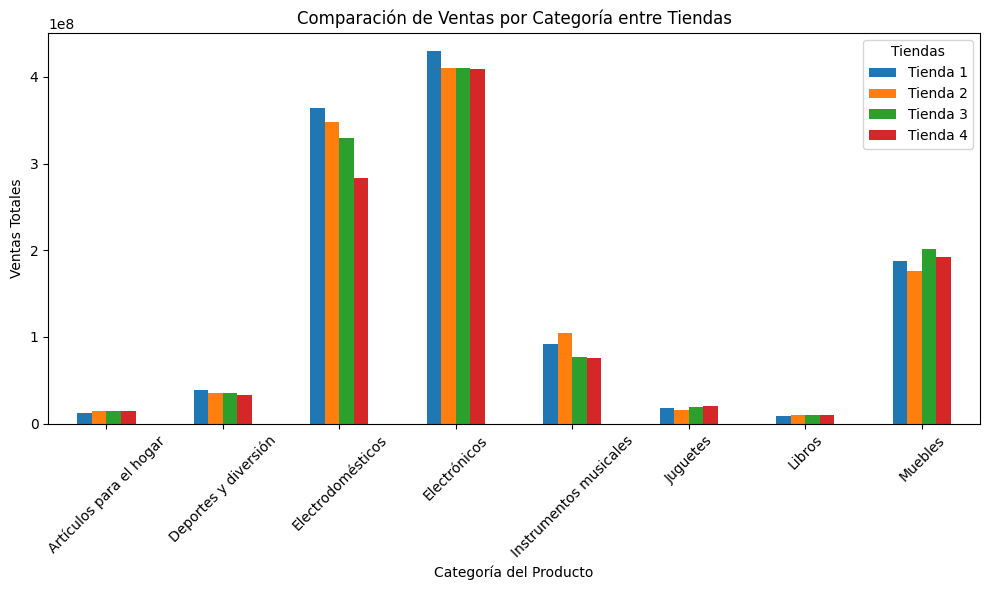

In [46]:
ventas_por_categoria_tienda1 = tienda.groupby('Categoría del Producto')['Precio'].sum()
ventas_por_categoria_tienda2 = tienda2.groupby('Categoría del Producto')['Precio'].sum()
ventas_por_categoria_tienda3 = tienda3.groupby('Categoría del Producto')['Precio'].sum()
ventas_por_categoria_tienda4 = tienda4.groupby('Categoría del Producto')['Precio'].sum()

ventas_combinadas = pd.DataFrame({
    'Tienda 1': ventas_por_categoria_tienda1,
    'Tienda 2': ventas_por_categoria_tienda2,
    'Tienda 3': ventas_por_categoria_tienda3,
    'Tienda 4': ventas_por_categoria_tienda4
})

ventas_combinadas.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Categoría del Producto')
plt.ylabel('Ventas Totales')
plt.title('Comparación de Ventas por Categoría entre Tiendas')
plt.legend(title='Tiendas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [85]:
calificacion_tienda1 = round(tienda["Calificación"].mean(), 3)
calificacion_tienda2 = round(tienda2["Calificación"].mean(),3)
calificacion_tienda3 = round(tienda3["Calificación"].mean(),3)
calificacion_tienda4 = round(tienda4["Calificación"].mean(),3)

print(f"La calificacion promedio por tienes es: \n\nTienda 1 --> {calificacion_tienda1} \nTienda 2 --> {calificacion_tienda2}  \nTienda 3 --> {calificacion_tienda3}  \nTienda 4 --> {calificacion_tienda4}")

La calificacion promedio por tienes es: 

Tienda 1 --> 3.977 
Tienda 2 --> 4.037  
Tienda 3 --> 4.048  
Tienda 4 --> 3.996


# 4. Productos más y menos vendidos

In [71]:
Producto_mas_vendido1 = tienda.groupby('Categoría del Producto')['Precio'].sum().idxmax()
Producto_menos_vendido1 = tienda.groupby('Categoría del Producto')['Precio'].sum().idxmin()
Producto_mas_vendido2 = tienda2.groupby('Categoría del Producto')['Precio'].sum().idxmax()
Producto_menos_vendido2 = tienda2.groupby('Categoría del Producto')['Precio'].sum().idxmin()
Producto_mas_vendido3 = tienda3.groupby('Categoría del Producto')['Precio'].sum().idxmax()
Producto_menos_vendido3 = tienda3.groupby('Categoría del Producto')['Precio'].sum().idxmin()
Producto_mas_vendido4 = tienda4.groupby('Categoría del Producto')['Precio'].sum().idxmax()
Producto_menos_vendido4 = tienda4.groupby('Categoría del Producto')['Precio'].sum().idxmin()

print(f"Tienda 1 \nEl producto mas vendido es: {Producto_mas_vendido1} \nEl producto menos vendido es: {Producto_menos_vendido1}")
print(f"Tienda 2 \nEl producto mas vendido es: {Producto_mas_vendido2} \nEl producto menos vendido es: {Producto_menos_vendido2}")
print(f"Tienda 3 \nEl producto mas vendido es: {Producto_mas_vendido3} \nEl producto menos vendido es: {Producto_menos_vendido3}")
print(f"Tienda 4 \nEl producto mas vendido es: {Producto_mas_vendido4} \nEl producto menos vendido es: {Producto_menos_vendido4}")

Tienda 1 
El producto mas vendido es: Electrónicos 
El producto menos vendido es: Libros
Tienda 2 
El producto mas vendido es: Electrónicos 
El producto menos vendido es: Libros
Tienda 3 
El producto mas vendido es: Electrónicos 
El producto menos vendido es: Libros
Tienda 4 
El producto mas vendido es: Electrónicos 
El producto menos vendido es: Libros


# 5. Envío promedio por tienda

In [87]:
costo_envio_promedio_tienda1 = round(tienda["Costo de envío"].mean())
costo_envio_promedio_tienda2 = round(tienda2["Costo de envío"].mean())
costo_envio_promedio_tienda3 = round(tienda3["Costo de envío"].mean())
costo_envio_promedio_tienda4 = round(tienda4["Costo de envío"].mean())

print(f"Costo de envio Promedio: \n\nTienda 1 --> {costo_envio_promedio_tienda1} \nTienda 2 --> {costo_envio_promedio_tienda2}  \nTienda 3 --> {costo_envio_promedio_tienda3}  \nTienda 4 --> {costo_envio_promedio_tienda4}")

Costo de envio Promedio: 

Tienda 1 --> 26019 
Tienda 2 --> 25216  
Tienda 3 --> 24806  
Tienda 4 --> 23459


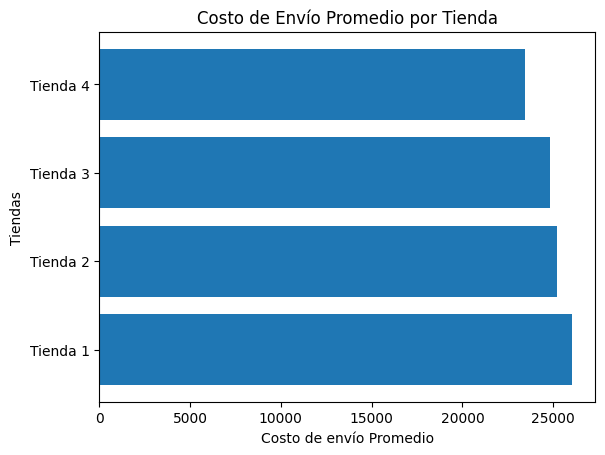

In [88]:
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
cantidad_filas = [costo_envio_promedio_tienda1, costo_envio_promedio_tienda2, costo_envio_promedio_tienda3, costo_envio_promedio_tienda4]
plt.barh(nombres_tiendas, cantidad_filas)
plt.xlabel('Costo de envío Promedio')
plt.ylabel('Tiendas')
plt.title('Costo de Envío Promedio por Tienda')
plt.show()

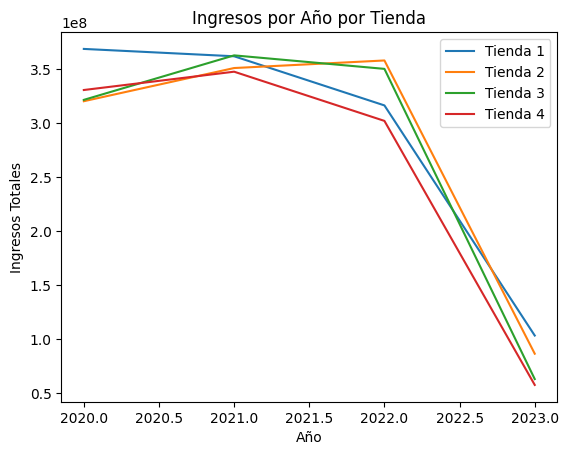

In [63]:

tienda['Año'] = pd.to_datetime(tienda['Fecha de Compra'], format='%d/%m/%Y').dt.year
tienda2['Año'] = pd.to_datetime(tienda2['Fecha de Compra'], format='%d/%m/%Y').dt.year
tienda3['Año'] = pd.to_datetime(tienda3['Fecha de Compra'], format='%d/%m/%Y').dt.year
tienda4['Año'] = pd.to_datetime(tienda4['Fecha de Compra'], format='%d/%m/%Y').dt.year

ingresos_por_año_tienda1 = tienda.groupby('Año')['Precio'].sum()
ingresos_por_año_tienda2 = tienda2.groupby('Año')['Precio'].sum()
ingresos_por_año_tienda3 = tienda3.groupby('Año')['Precio'].sum()
ingresos_por_año_tienda4 = tienda4.groupby('Año')['Precio'].sum()

plt.plot(ingresos_por_año_tienda1.index, ingresos_por_año_tienda1.values, label='Tienda 1')
plt.plot(ingresos_por_año_tienda2.index, ingresos_por_año_tienda2.values, label='Tienda 2')
plt.plot(ingresos_por_año_tienda3.index, ingresos_por_año_tienda3.values, label='Tienda 3')
plt.plot(ingresos_por_año_tienda4.index, ingresos_por_año_tienda4.values, label='Tienda 4')

plt.xlabel('Año')
plt.ylabel('Ingresos Totales')
plt.title('Ingresos por Año por Tienda')
plt.legend()  # Mostrar la

## 📊Informe de Análisis de Desempeño de Tiendas

###__Introducción__

Este informe se mostrara el análisis del desempeño de 4 tiendas con el fin de determinar cual de ellas presenta el rendimiento mas bajo que tendrá que ser considerada para el cierre. para ellos se utilizaron 2359 registros en promedio por tienda, sobre los que se aplicaron distintos análisis y visualizaciones
que veremos a continuación.

####__Ingresos Totales por Tienda:__

Tienda 1: $1.150.880.400

Tienda 2: $1.116.343.500

Tienda 3: $1.098.019.600

Tienda 4: $1.038.375.700

Se observa que la Tienda 1 destaca con el ingreso más alto, mientras que la Tienda 4 se encuentra considerablemente por debajo, con una diferencia de más de 100 millones respecto a la tienda con mejor desempeño.

####__Ventas por Categoría:__

Según el gráfico de barras “Comparación de Ventas por Categoría entre Tiendas”, se evidencia que las categorías más vendidas en todas las tiendas son Electrónicos y Electrodomésticos. No obstante, la Tienda 4 muestra un rendimiento visiblemente menor en la categoría de Electrodomésticos, lo cual podría explicar, en parte, sus ingresos más bajos. En el resto de las categorías, las tiendas se mantienen relativamente parejas.

####__Coste de Envío Promedio por Tienda:__

Tienda 1: 26.019

Tienda 2: 25.216

Tienda 3: 24.806

Tienda 4: 23.459

La Tienda 4 presenta el coste de envío promedio más bajo, lo que podría deberse a una estrategia de reducción de costos. Sin embargo, este factor no ha sido suficiente para compensar sus menores ingresos ni para posicionarse mejor que sus tiendas compañeras, lo que reduce el peso positivo de esta métrica frente al resto del análisis.

####__Tendencia de Ventas por Año:__

El gráfico de líneas que muestra la evolución de ventas por año indica que, si bien las tiendas tienen comportamientos similares a lo largo del tiempo, la Tienda 4 se mantiene constantemente como la de menor volumen de ventas anuales.

####__Calificación Promedio de Clientes:__

Tienda 1: 3.98

Tienda 2: 4.04

Tienda 3: 4.05

Tienda 4: 3.99

Al observar las calificaciones promedio de los clientes, se aprecia que la Tienda 4 también se mantiene por debajo del promedio de sus tiendas compañeras, lo cual puede reflejar una experiencia de cliente ligeramente menos satisfactoria en comparación a las demás sucursales.

###Conclusión

Con base en los análisis y visualizaciones realizados, se concluye que la Tienda 4 es la que presenta el desempeño más bajo en múltiples dimensiones: menor ingreso total, menores ventas en una de las categorías más importantes (Electrodomésticos), menor calificación de clientes y menor volumen de ventas en el tiempo.

Si bien tiene el coste de envío promedio más bajo, este aspecto no ha logrado traducirse en un mejor desempeño global, lo que indica que otras variables tienen mayor peso en la evaluación final.

Con la información actual permite tomar una decisión informada y razonable de recomendar el cierre de la Tienda 4.